<hr style="border:2px solid gray"> </hr>

<h1><center>Predicting the Purchasing Behavior of Online Shoppers</center></h1>

<hr style="border:2px solid gray"> </hr>

### CS530-01, Spring 2020  
**Emily Daskas** - *Data Preprocessing & Visualization, Model Construction, Presentation* <br/> 
**Lily Foster** - *Intro to Dataset, Define Project, Conclusion/Future Plans, Report Formatting, Presentation* <br/> 
**Goldie Malamud** - *Data Preprocessing & Visualization, Model Construction, Presentation* <br/>

---
***We completed the entirety of this project on Zoom via screen sharing and Remote Control access as a group. This allowed us to talk through all of our ideas and collaborate on each section.***

<hr style="border:1px solid gray"> </hr>
<hr style="border:1px solid gray"> </hr>

<h2><center>An Introduction to the Dataset (10%)</center></h2>

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
We analyzed the ["Online Shoppers Purchasing Intention Dataset"](http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset), obtained from the UCI Machine Learning Repository where it was donated in August 2018. This dataset contains metrics, as pulled from Google Analytics, of an undisclosed e-commerce website regarding the customer behavior for each session on their website over a one year period. It shows 12,330 sessions, with 10 numerical attributes and 8 categorical attributes as described below:


### <u>Numerical Features:</u>

| Feature Name | `Variable Name` | Feature Description | Min. Value | Max. Value | SD |
| :----------- | :- | :------------------ | :--------: | :--------: | :-: |
| ***Administrative*** | `Administrative` | Number of pages visited by the visitor about account management | 0 | 27 | 3.32 |
| ***Administrative Duration*** | `Administrative_Duration` | Total amount of time (in seconds) spent by the visitor on account management related pages | 0 |3,398 | 176.70 |
| ***Informational*** | `Informational` | Number of pages visited by the visitor about the website, communication and address information of the shopping site | 0 | 24 | 1.26 |
| ***Informational Duration*** | `Informational_Duration` |Total number of time (in seconds) spent by the visitor on informational pages | 0 | 2,549 | 140.64 |
| ***Product Related*** | `ProductRelated` | Number of pages visited by visitor about product-related pages | 0 | 705 | 44.45 |
| ***Product Related Duration*** | `ProductRelated_Duration` | Total amount of time (in seconds) spent by the visitor on product related pages | 0 | 63,973 | 1,912.25 |
| ***Bounce Rate*** | `BounceRates` | Average bounce rate value of the pages visited by the visitor | 0 | 0.2 | 0.04 |
| ***Exit Rate*** | `ExitRates` | Average exit rate value of the pages visited by the visitor | 0 | 0.2 | 0.05 |
| ***Page Value*** | `PageValues` | Average page value of the pages visited by the visitor | 0 | 361 | 18.55 |
| ***Special Day*** | `SpecialDay` | Closeness of the time of the session to a special day/holiday | 0 | 1.0 | 0.19 |

---

### <u>Categorical Features:</u>

| Feature Name | `Variable Name` | Feature Description | Number of <br/> Categorical Values |
| :----------- | :- | :------------------ | :--------------------------: |
| ***Operating Systems*** | `OperatingSystems` | Operating system of computer used by the visitor to reach website| 8 |
| ***Browser*** | `Browser` | Internet brower used by visitor to access website | 13 |
| ***Region*** | `Region` | Geographic region from which the visitor started their session on website | 9 |
| ***Traffic Type*** | `TrafficType` | Traffic source that brought visitor to website (e.g., banner, SMS, direct) | 20 |
| ***Visitor Type*** | `VisitorType` | Category of visitor as either "*New Visitor*", "*Returning Visitor*", or "*Other*" | 3 |
| ***Weekend*** | `Weekend` | Boolean value indicating whether the visitor accessed the website on a weekend (Saturday or Sunday) | 2 |
| ***Month*** | `Month` | Month from date visitor accessed website | 12 |
| ***Revenue*** | `Revenue` | Boolean value indicating whether the website session resulted in a transaction | 2 |



<hr style="border:1px solid gray"> </hr>
<hr style="border:1px solid gray"> </hr>

<h2><center>Define the Problem (10%)</center></h2>

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Our goal is to use the Online Shopper Intensions dataset to create a classification model to predict whether or not a customer will make a purchase based on their behavior while visiting the e-commerce website. We were interested in this dataset because it gives us the opportunity to explore valuble information regarding the efficiency and success of an e-commerce site, that can hopefully then be applied to future websites as well. Determining which features have the greatest impact on a user in influencing their purchasing decisions can ultimately help to increase a business's overall revenue by directing them towards which types of pages on their website to focus on, when to hold sales, etc. The main assumption that we're making about this dataset is that each session is unique in terms of the website's individual visitor. Realistically, a customer may visit the website, leave without making a purchase, and then return the next day to make their purchase. However, we don't have access to this information and therefore are making the assumption for this report that each session is an isolated case. Our main task is to identify the features that hold the most significance when predicting Revenue. The problem we're trying to solve is finding the best-fit model to our dataset that yields the highest test accuracy and AUC scores. Therefore, the `'Revenue'` column is our target variable. 

<hr style="border:1px solid gray"> </hr>
<hr style="border:1px solid gray"> </hr>

<h2><center>Functions used for Data Preprocessing and Visualization:</center></h2>

<hr style="border:1px solid gray"> </hr>

**The following cells declare functions to be used for preprocessing of the dataset:**

> `'find_anomalies()'`: Identifies outliers in the dataset.

> `'replace_outliers_mean(column)'`: A function that takes in a column name and replaces the outliers with the mean of that column

> `'replace0_outliers_mean(column)'`: A function that is similar to the ***replace_outliers_mean*** function, but is intended to be used for zero-inflated features. It handles zero-inflated data by removing all rows with containing zeros in it prior to finding the outliers. When it finds the outliers, it replaces them with the mean of that column and then places the zeros back in.


In [16]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    anomalies = []
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(random_data.index(outlier))
    return anomalies



# Functions to find outliers       
def replace_outliers_mean(column):
    temp = []
    for i in df[column]:
        temp.append(i)
    mean = np.mean(temp) 
    outlier_index = find_anomalies(temp)
    for i in outlier_index:
        df[column][i] = mean
        
        
# Functions to find outliers of zero inflated data
# Removes all rows with zeros, finds outliers, then places zero rows back into dataset
def replace0_outliers_mean(column):
    temp = []
    for i in df[column]:
        if i != 0:
            temp.append(i)
    meanTemp = np.mean(temp) 
    outlier_index = find_anomalies(temp)
    for i in outlier_index:
        df[column][i] = meanTemp


<hr style="border:1px solid gray"> </hr>
<hr style="border:1px solid gray"> </hr>

<h2><center>Data Preprocessing and Visualization (25%)</center></h2>

<hr style="border:1px solid gray"> </hr>

In [17]:
!python --version
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt



Python 3.8.2


<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;**1)** &nbsp;&nbsp;&nbsp;We first read in the dataset as a .csv file, downloaded directly from the UCI Machine Learning Repository [website](http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset).

<hr style="border:1px solid gray"> </hr>

In [18]:
#import dataset
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;**2)** &nbsp;&nbsp;&nbsp;During our initial analysis of the dataset we found there to be a significant number of outliers. Upon further inspection we discovered that the significant number of outliers was due to our data being zero-inflated. Due to there being several features containing around or above 50% zeros, our mean was skewed significantly to the left, causing higher numbers to be falsely considered outliers.<br/>  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To handle this situation, as seen in the following cells, we first calculate the percent of zeros for each numerical feature and then plot them on a barchart. We are then easily able to identify which features are near or above our set threshold of 50%, as these are considered to be zero-inflated.
<hr style="border:1px solid gray"> </hr>

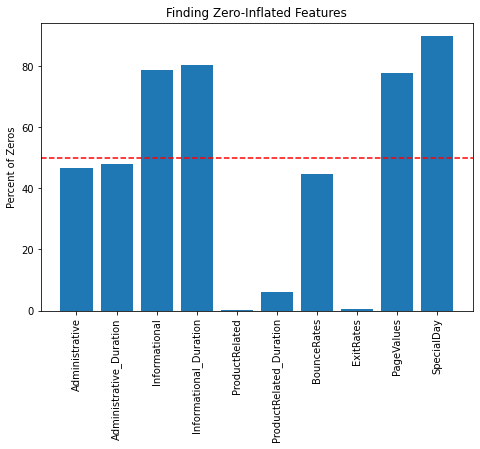

In [19]:
#making bar chart w/ 0 percents 
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                        'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                        'SpecialDay']
percent0s = []
for n in numerical_features:
    count = 0
    for i in range(len(df[n])):
        if df[n][i] == 0:
            count += 1
    percent0s.append(count/len(df[n])*100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(numerical_features, percent0s)
plt.xticks(rotation = 'vertical')
plt.title("Finding Zero-Inflated Features")
plt.ylabel("Percent of Zeros")
plt.axhline(y=50,color = 'red').set_linestyle('--')
#ax.set_xticklabels(numerical_features)
plt.savefig('Zero_Inflation.png')
plt.show()  

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
From the above chart, we can see that all of the features are zero-inflated, other than `'ProductRelated'`, `'ProductRelated_Duration'`, and `'ExitRates'`. With this information, we were then able to write and use a function, as seen above, to detect the actual outliers and replace them with the mean of the feature. 

<hr style="border:1px solid gray"> </hr>



In [20]:
#0 inflated replacing outliers
replace0_outliers_mean('Administrative')
replace0_outliers_mean('Administrative_Duration')
replace0_outliers_mean('Informational')
replace0_outliers_mean('Informational_Duration')
replace0_outliers_mean('BounceRates')

#other replacing outliers
replace_outliers_mean('ExitRates')
replace_outliers_mean('ProductRelated')
replace_outliers_mean('ProductRelated_Duration')



<ipython-input-16-5f66e3694d83>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = meanTemp
<ipython-input-16-5f66e3694d83>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = mean


<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;**3)** &nbsp;&nbsp;&nbsp; Next, we work on Categorical feature selection using label encoding and chi-squared testing. Since we have several features in our dataset that have little or no correlation with our target variable, `'Revenue'`, we need to identify them and drop them from our dataset in order to create the best fit model. First, we use the ordinal label encoder from scikit-learn to encode our Categorical features to Numerical, as seen below:

<hr style="border:1px solid gray"> </hr>

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc


def prepare_labels(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X = df.iloc[:, :-1]
X_cat = df.drop(numerical_features,axis=1)
X_cat = X_cat.drop('Revenue',axis=1)
y = df.Revenue


X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.20, random_state = 42)

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) # cat -> numerical
y_train_enc, y_test_enc = prepare_labels(y_train, y_test) # labels -> numerical 


<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;**4)** &nbsp;&nbsp;&nbsp;After encoding our variables, we use chi-squared for feature selection of categorical variables.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Chi-squared tests can be used to test the independence of two features, allowing us to perform categorical variable feature selection to indentify which features are highly dependent on our target variable, `'Revenue'`.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Below we plot the score from the chi-squared test for each feature to visualize the relationships between each feature, and then allowing us to select which features to keep or drop from our dataset.

<hr style="border:1px solid gray"> </hr>

Feature 0: 66.417453
Feature 1: 3.462493
Feature 2: 10.798153
Feature 3: 3.181041
Feature 4: 0.019107
Feature 5: 32.630103
Feature 6: 5.211405


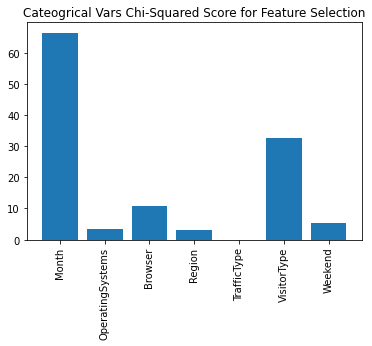

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
categorical_features =['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']

dfCat = pd.DataFrame(X_train_enc, columns = categorical_features)

# feature selection
def select_features(X_train, y_train, X_test,score):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc,chi2)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.title("Cateogrical Vars Chi-Squared Score for Feature Selection")
pyplot.xticks([i for i in range(len(fs.scores_))], categorical_features, rotation=90)

pyplot.show()

In [23]:
dfCat = dfCat.drop(['OperatingSystems','Browser','Region','TrafficType','Weekend'],axis=1)


<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;**5)** &nbsp;&nbsp;&nbsp;Similarly to how we handled our categorical feature selection using chi-squared, we can use ANOVA for our numerical feature selection. Again, we plot the resulting scores below:


<hr style="border:1px solid gray"> </hr>

Feature 0: 748.509740
Feature 1: 28945.130747
Feature 2: 290.050485
Feature 3: 22477.181197
Feature 4: 10205.074637
Feature 5: 392275.891786
Feature 6: 22.400503
Feature 7: 22.283511
Feature 8: 141946.819292
Feature 9: 51.543592


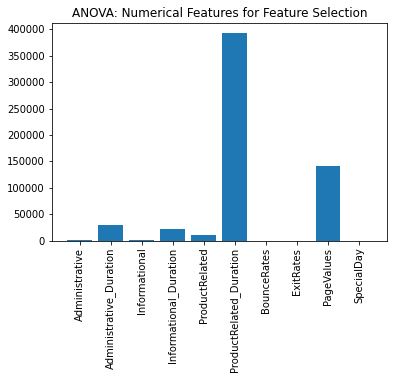

In [24]:
from sklearn.feature_selection import f_classif

X_Num = df.drop('Revenue',axis=1)
for c in X_Num:
    if c in categorical_features:
        X_Num = X_Num.drop(c,axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_Num, y, test_size=0.20, random_state = 42)

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,f_classif)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.title("ANOVA: Numerical Features for Feature Selection")
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks([i for i in range(len(fs.scores_))], numerical_features, rotation=90)
pyplot.show()


In [25]:
X_Num = X_Num.drop(['Administrative','Informational','ProductRelated','BounceRates','ExitRates','SpecialDay'],axis =1)


<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;**6)** &nbsp;&nbsp;&nbsp;Below, we drop all of the features that we have identified as having low or no correlation to our target variable, `'Revenue'`. This then results in a new, smaller dataframe containing only our top correlated features to be used in the creation of our model.

<hr style="border:1px solid gray"> </hr>

In [26]:
selectedFeaturesDF = df.drop(['OperatingSystems','Browser','Region','TrafficType','Weekend','Administrative',
                              'Informational','ProductRelated','BounceRates','ExitRates','SpecialDay'],axis=1)

selectedFeaturesDF


,Administrative_Duration,Informational_Duration,ProductRelated_Duration,PageValues,Month,VisitorType,Revenue
0,0.0,0.0,0.000000,0.000000,Feb,Returning_Visitor,False
1,0.0,0.0,64.000000,0.000000,Feb,Returning_Visitor,False
2,0.0,0.0,0.000000,0.000000,Feb,Returning_Visitor,False
3,0.0,0.0,2.666667,0.000000,Feb,Returning_Visitor,False
4,0.0,0.0,627.500000,0.000000,Feb,Returning_Visitor,False
...,...,...,...,...,...,...,...
12325,145.0,0.0,1783.791667,12.241717,Dec,Returning_Visitor,False
12326,0.0,0.0,465.750000,0.000000,Nov,Returning_Visitor,False
12327,0.0,0.0,184.250000,0.000000,Nov,Returning_Visitor,False
12328,75.0,0.0,346.000000,0.000000,Nov,Returning_Visitor,False


<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;**7)** &nbsp;&nbsp;&nbsp;We now take our remaining categorical features (`'Month'`, `'VisitorType'`, and `'Revenue'`, our target), and turn them into dummy variables. However, dummy variables are vulnerable to the "dummy variable trap", where the transition risks the variables becoming colinear to eachother. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For example, `'Revenue'` is a boolean value so it can only be one of two options: true or false. When these are split into dummy variables where the possible values are only 0 and 1, they will be direct inverses of each other and will be perfectly collinear. To prevent this problem, we will drop one generated dummy variable from each feature, by adding the parameter: `drop_first = true`.

<hr style="border:1px solid gray"> </hr>

In [27]:
#creating dummy variables for all categorial feautres
df_dummy=pd.get_dummies(data=selectedFeaturesDF,columns=['Month', 'VisitorType', 'Revenue'],drop_first=True)
df_dummy.rename(columns={'Revenue_True':'Revenue'},inplace=True)
df_dummy

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,PageValues,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,0.0,0.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,64.000000,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,2.666667,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,627.500000,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.0,1783.791667,12.241717,1,0,0,0,0,0,0,0,0,0,1,0
12326,0.0,0.0,465.750000,0.000000,0,0,0,0,0,0,1,0,0,0,1,0
12327,0.0,0.0,184.250000,0.000000,0,0,0,0,0,0,1,0,0,0,1,0
12328,75.0,0.0,346.000000,0.000000,0,0,0,0,0,0,1,0,0,0,1,0


<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
To visualize the direct correlation of `'PageValues'` to `'Revenue'` we created the below plot showing that the higher the Page Value, the more likely that the e-commerce session will result in Revenue. The graph shows that in the one-year period represented in this dataset, Page Values equaling 270.76 or above resulted in revenue 100% of the time.

<hr style="border:1px solid gray"> </hr>

In [28]:
#show page value vs. revenue count
G1 = 0
G1_F = 0
G2 = 0
G3 = 0
G4 = 0
G4_F = 0
G2_F = 0
G3_F = 0
G5 = 0
G5_F = 0
G6 = 0
G6_F = 0
G7 = 0
G7_F = 0
G8 = 0
G8_F = 0
G9 = 0
G9_F = 0
for i in range(len(df['Revenue'])):
   
    if df['PageValues'][i] == 0:
        if df['Revenue'][i] == True:
            G1 += 1
        else:
            G1_F +=1
    elif df['PageValues'][i] > 0 and df['PageValues'][i] <=45.125:
        
        if df['Revenue'][i] == True:
            G2 += 1
        else:
            G2_F +=1
    elif df['PageValues'][i] > 45.125 and df['PageValues'][i] <=90.25:
        
        if df['Revenue'][i] == True:
            G3 += 1
        else:
            G3_F +=1
    elif df['PageValues'][i] > 90.25 and df['PageValues'][i] <=135.375:
        if df['Revenue'][i] == True:
            G4 += 1
        else:
            G4_F +=1
    elif df['PageValues'][i] > 135.375 and df['PageValues'][i] <=180.5:
        if df['Revenue'][i] == True:
            G5 += 1
        else:
            G5_F +=1
    elif df['PageValues'][i] > 180.5 and df['PageValues'][i] <=225.625:
        if df['Revenue'][i] == True:
            G6 += 1
        else:
            G6_F +=1
    elif df['PageValues'][i] > 225.625 and df['PageValues'][i] <=270.75:
        if df['Revenue'][i] == True:
            G7 += 1
        else:
            G7_F +=1
    elif df['PageValues'][i] > 270.75 and df['PageValues'][i] <=315.875:
        if df['Revenue'][i] == True:
            G8 += 1
        else:
            G8_F +=1
    elif df['PageValues'][i] > 315.875 and df['PageValues'][i] <=361:
        if df['Revenue'][i] == True:
            G9 += 1
        else:
            G9_F +=1
G1 = (G1/(G1+G1_F))
G2 = (G2/(G2+G2_F))
G3 = (G3/(G3+G3_F))
G4 = (G4/(G4+G4_F))
G5 = (G5/(G5+G5_F))
G6 = (G6/(G6+G6_F))
G7 = (G7/(G7+G7_F))
G8 = (G8/(G8+G8_F))
G9 = (G9/(G9+G9_F))
groups = [G1,G2,G3,G4,G5,G6,G7,G8,G9]

Text(0, 0.5, 'Percent of Users produced Revenue')

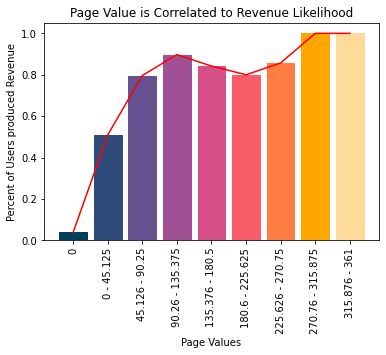

In [29]:
labels = ['0','0 - 45.125','45.126 - 90.25','90.26 - 135.375','135.376 - 180.5','180.6 - 225.625','225.626 - 270.75',
         '270.76 - 315.875','315.876 - 361']
bar = plt.bar(labels,groups)
plt.plot(labels,groups,color = 'r')
plt.xticks(rotation = 'vertical')
bar[0].set_color('#003f5c')
bar[1].set_color('#2f4b7c')
bar[2].set_color('#665191')
bar[3].set_color('#a05195')
bar[4].set_color('#d45087')
bar[5].set_color('#f95d6a')
bar[6].set_color('#ff7c43')
bar[7].set_color('#ffa600')
bar[8].set_color('#ffdb99')
plt.title('Page Value is Correlated to Revenue Likelihood')
plt.xlabel('Page Values')
plt.ylabel('Percent of Users produced Revenue')

<hr style="border:1px solid gray"> </hr>
<hr style="border:1px solid gray"> </hr>

<h2><center>Model Construction (45%)</center></h2>

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
We first split our data into our test sets and training sets using scikit-learn's 'train_test_split' function from model_selection. We can then begin to construct our model. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
We have chosen a list of classification models that we think may be effective for our data. We explore the following models: ***KNN***, ***SVC***, ***Random Forest***, ***AdaBoost***, ***Naive Bayes***, ***LDA***, and ***Logisitic Regression***. For each of these models we use *k*-fold cross-validation with 5 splits to find the AUC and accuracy scores, as shown below:

<hr style="border:1px solid gray"> </hr>

In [30]:
X = df_dummy.iloc[:, :-1]
y = df_dummy.Revenue


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)


In [31]:
#models to explore
clfs = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "RBF SVM": SVC(gamma='auto'),
    "Random Forest": RandomForestClassifier(max_depth=2, n_estimators=10, max_features=1),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "Logistic Regression" : LogisticRegression(solver ='lbfgs',max_iter = 1000)}

keys = list(clfs.keys())
values = list(clfs.values())
    

#Using K-Fold Cross Validation to find the best accuracies/AUCs of each model  
mean_aucs = []
mean_accuracies = []
model_names = []

for v in values:
    
    kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
    auc = model_selection.cross_val_score(v,X,y,cv=kfold,scoring='roc_auc')
    accuracy = model_selection.cross_val_score(v,X,y,cv=kfold,scoring='accuracy')
    index = values.index(v)
    mean_auc = auc.mean()
    mean_accuracy = accuracy.mean() * 100
    mean_aucs.append(mean_auc)
    mean_accuracies.append(mean_accuracy)
    model_name = keys[index]
    model_names.append(model_name)

mean_models = list(zip(mean_aucs,mean_accuracies, model_names))
mean_models.sort()
print("AUC/Accuracy/Model Name")
mean_models


AUC/Accuracy/Model Name


[(0.7417337318182688, 86.05839416058394, 'Nearest Neighbors'),
 (0.8138748033322445, 84.45255474452556, 'RBF SVM'),
 (0.8246900787728869, 82.82238442822386, 'Naive Bayes'),
 (0.8738009026642637, 84.52554744525548, 'Random Forest'),
 (0.8931733744513277, 88.4022708840227, 'Logistic Regression'),
 (0.8944844166523614, 87.92376317923765, 'LDA'),
 (0.9147022054349293, 88.77534468775345, 'AdaBoost')]

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
By finding the mean value of all of the AUC scores using 5-fold cross-validation for each model, we can now plot them using a bar graph to visualize which models are the best fit for our dataset.

<hr style="border:1px solid gray"> </hr>

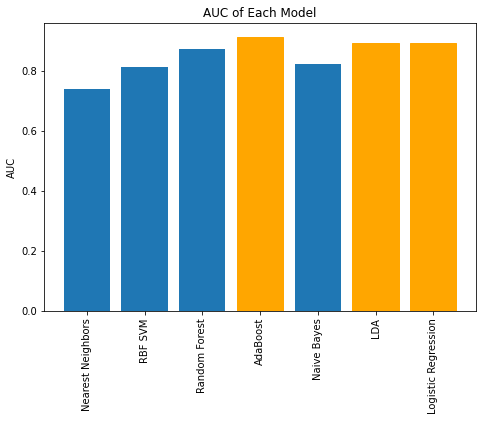

In [32]:
#plot AUC of each model
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar = ax.bar(model_names, mean_aucs)
plt.xticks(rotation = 'vertical')
plt.title("AUC of Each Model")
plt.ylabel("AUC")
bar[3].set_color('#ffa600')
bar[5].set_color('#ffa600')
bar[6].set_color('#ffa600')
plt.show()

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
In the bar graph above we can see the 3 highest AUCs highlighted in yellow. Due to their high AUCs and accuracies, we have chosen to use the ***Logistic Regression***, ***AdaBoost***, and ***LDA*** models.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<u>**Logistic Regression**</u> works well with binary classification models, although it doesn't work as well with multi-class classification. This would explain why it worked well in our classification problem, as we are only classifying a boolean value of whether or not a visitor to the e-commerce website will produce Revenue or not.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<u>**Adaboost**</u> is a type of boosting algorithm, which combines several weaker models to create one stronger model. It performs better than random forests and is computationally faster, which could explain why this was one of our strongest models. However, it is important to note that after a certain number of iterations, it can begin to overfit, so we need to be careful to check this before selecting it as our final model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Linear Discriminant Analysis, or <u>**LDA**</u>, can be used as both a classifier and a dimensionality reduction technique. When used as a classifier, as we did for the purpose of this dataset, it uses the same underlying linear model as Logistic Regression, but LDA maximizes the complete likelihood while Logistic Regression maximizes only the conditional likelihood. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Below we fit our models to the train and test datasets as defined earlier. We plot the ROC curves for the different models we've chosen, along with their AUC and accuracy scores from our test set.

<hr style="border:1px solid gray"> </hr>

AdaBoost
Accuracy: 0.8799675587996756
AUC: 0.7401459854014598


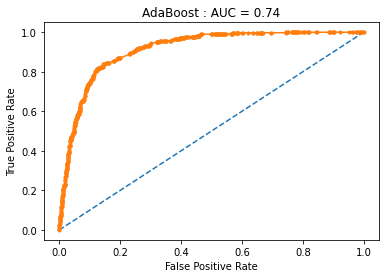

Logistic Regression
Accuracy: 0.8706407137064072
AUC: 0.6596107055961071


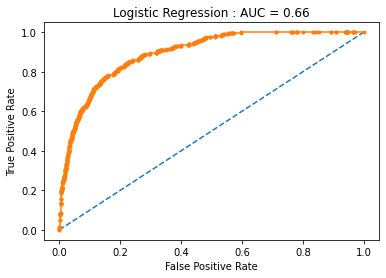

LDA
Accuracy: 0.8661800486618005
AUC: 0.6394160583941605


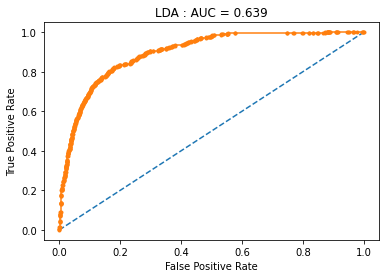

KNN
Accuracy: 0.8564476885644768
AUC: 0.6277372262773723


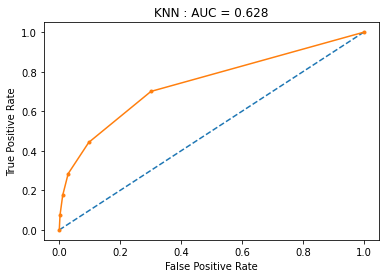

In [41]:
#function used to classify Xs & ys for each model
import seaborn as sns

def plot_ROC(X_test,y_test,clf,title,auc):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs) 
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs) 
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
    pyplot.plot(lr_fpr, lr_tpr, marker='.')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title(title + " : AUC = {}".format(round(auc,3)))
    # show the plot
    pyplot.show() 

def classify(X_train,X_test,y_train,y_test,clf_chosen):
    AUCS = []
    accuracies = []
    i=0
    for c in clf_chosen.values():
        c.fit(X_train,y_train)
        y_pred = c.predict(X_test)
        auc = roc_auc_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        print(list(clf_chosen.keys())[i])
        print("Accuracy:",accuracy)
        print("AUC:",auc)
        plot_ROC(X_test,y_test,c,list(clf_chosen.keys())[i],auc)
        i+=1

clf_chosen_update = {
             "AdaBoost": AdaBoostClassifier(),
             "Logistic Regression" : LogisticRegression(solver ='lbfgs',max_iter = 1000),
             "LDA": LinearDiscriminantAnalysis(),
                "KNN":  KNeighborsClassifier()}

#classify using each model, prints out AUC & Accuracy        
classify(X_train,X_test,y_train,y_test,clf_chosen_update)


<hr style="border:1px solid gray"> </hr>

### **Finally, we will fine tune the parameters for our selected models:**

---
---

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
For <u>**Logistic Regression**</u>, we use scikit-learn's 'GridSearchCV' function from model_selection to conduct an exhaustive test of the parameters C and penalty. C specifies the regularization strength and penalty is used to specialize the norm in penalization. We can see below that by tuning these parameters for logistic regression, our cross-validation score is **88.73%**.

<u>**Best Parameters:**</u> <br/> 
`{'C': 7.742636826811269, 'penalty': 'l2'}`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
We then used these best parameters to run Logistic Regression on our testing set, resulting in an accuracy score of **86.9%**. This was slightly lower than our original model, which had a score of **87.06%**. Given that the difference is only **0.16%**, we conclude that tuning the hyperparameters did not make a significant improvement to our model. 

<hr style="border:1px solid gray"> </hr>

In [45]:
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(solver ='lbfgs',max_iter = 1000)
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(clf.best_params_)
print(clf.best_estimator_)
print("Accuracy: ",clf.best_score_)


/opt/anaconda3/envs/newEnv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/newEnv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/newEnv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/envs/newEnv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/envs/n

/opt/anaconda3/envs/newEnv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/newEnv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/newEnv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/envs/newEnv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


{'C': 7.742636826811269, 'penalty': 'l2'}
LogisticRegression(C=7.742636826811269, max_iter=1000)
Accuracy:  0.8873682132726906


Accuracy: 0.8690186536901865
AUC: 0.65669099756691


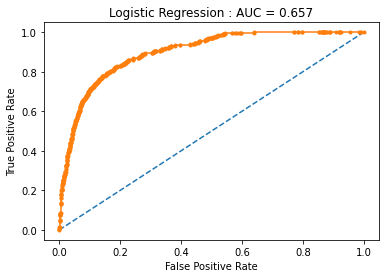

In [43]:
logistic_tuned = LogisticRegression(C= 7.742636826811269, penalty= 'l2',solver ='lbfgs',max_iter = 1000)

logistic_tuned.fit(X_train,y_train)

y_pred = logistic_tuned.predict(X_test)

auc = roc_auc_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)



print("Accuracy:",accuracy)

print("AUC:",auc)

plot_ROC(X_test,y_test,logistic_tuned,'Logistic Regression',auc)



<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
We did not tune any hyperparameters for <u>**LDA**</u> because according to the scikit-learn [docs](https://scikit-learn.org/stable/modules/lda_qda.html), LDA "have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune." Our final accuracy score from our original model for LDA was **86.62%**. 

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Next, we tune the hyperparameters for <u>**AdaBoost**</u> again using GridSearch.

<hr style="border:1px solid gray"> </hr>

In [36]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)
print(search.best_params_)
print(search.best_score_)



{'learning_rate': 0.01, 'n_estimators': 500}
0.8956813833383684


<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
We found the best parameters for <u>**AdaBoost**</u> to be ***learning_rate*** = 0.01 and ***n_estimators*** = 500. Using these parameters, we fit the model with our train set, and achieved an accuracy score of **88.08%** for our test set, which was higher than our original model with a test accuracy of **87.99%**. We conclude that the hyperparameters improved our AdaBoost model. 

<hr style="border:1px solid gray"> </hr>

0.8807785888077859


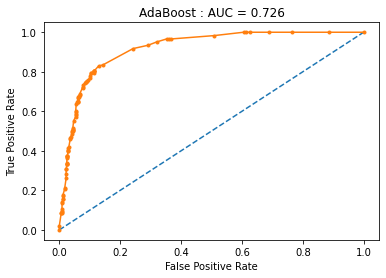

In [46]:
ada1=AdaBoostClassifier(learning_rate=0.01,n_estimators=500)

ada1.fit(X_train,y_train)
y_pred = ada1.predict(X_test)

auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
plot_ROC(X_test,y_test,ada1,'AdaBoost',auc)

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Below we have defined a set of possible parameters for our <u>**KNN**</u> model. We decided to tune the hyperparameters of KNN because with LDA there were no parameters to tune. We wanted to compare one of our lowest accuracy models to see how it compared to our top models after tuning it's parameters. We will test every combination of them with GridSearch which will conduct an exhaustive search on the parameters. The parameters we are testing are ***n_neighbors*** (the number of nearest neighbors to use), ***weights*** (the weight function to be used for prediction), and the ***metric*** (the distance metric to be used in the tree). As we can see from the results, by tuning our hyperparameters our accuracy score was **85.48%** compared to the original **85.64%** from our base model. We conclude that fine-tuning the parameters for KNN did not yield a higher test accuracy. 

<hr style="border:1px solid gray"> </hr>

In [47]:
grid_params  =  {
    'n_neighbors': [3,5,11, 19],
    'weights': ['uniform',  'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.2s finished


In [48]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

0.8548256285482563


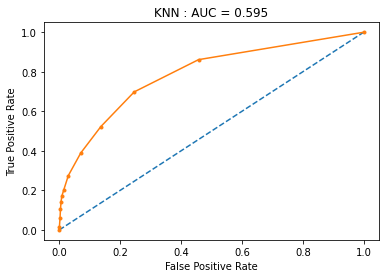

In [49]:
knn_tuned = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 11, weights= 'uniform')
knn_tuned.fit(X_train, y_train)

y_pred = knn_tuned.predict(X_test)

auc = roc_auc_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
plot_ROC(X_test,y_test,knn_tuned,'KNN',auc)

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Finally, we conclude that the best-fit model to our Online Shopping Intentions dataset is <u>**Adaboost**</u> with a ***learning rate*** = 0.01 and ***n_estimators*** = 500, resulting in a **Test Accuracy score of 88.08%** and **AUC score of 72.6%**. Adaboost was our best-fit model due to the fact that it combines several weak-learner algorithms and gradually course-corrects to a better fit model.

<hr style="border:1px solid gray"> </hr>
<hr style="border:1px solid gray"> </hr>

<h2><center>Future Plans (10%)</center></h2>

<hr style="border:1px solid gray"> </hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
This dataset has a number of opportunities for further exploration. In terms of models, we predict that it would be worth training and applying a Neural Network to this dataset to see if it can yield a higher AUC/accuracy scores. Neural Networks require a large amount of data to be most effective which is why we did not implement any this time but would be interested in doing so in the future.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
We are also interested in expanding this analysis to include more data from different websites. Do different types of e-commerce website yield different results? We could also add in additional factors for consideration such as how each website advertises, website layouts, and what platforms they engage with the majority of their customers. This type of dataset is not normally published by businesses due to the sensitivity of the information, making it unattainable at the time of this report.

This study is important to seeing what really drives consumer intention when visiting an e-commerce website. The results can be used to increase revenue to a site by focusing on what features impact revenue the most.